# Pr√°ctica 2 Detecci√≥n de puntos relevantes y construcci√≠n de panoramas 

Autor: Blanca Cano Camarero 
Fecha: Noviembre 2021 


In [1]:
'''
Ejecute esta celda. 
Salvo tener la necesidad de cambiar la ruta donde se leen las im√°genes, no es necesario la lectura de √©sta
celda, ya que contiene: 
1. Bibliotecas necesarias.
2. Indicaci√≥n de la ruta de donde se toman las im√°genes y la lectura de las im√°genes.
3. Conjunto de funciones auxiliaras como las utilizadas para mostrar im√°genes en pantalla. 
√âstas est√°n tomadas de las pr√°cticas 0 y 1 con a lo sumo tienen ligeras modificaciones.  
'''
# Import b√°sicos
# Configuraci√≥n previa 
# 1 modulos utilizados
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Funciones auxiliares necesarias de otras pr√°cticas
# ___ Lectura de im√°genes___
# path carpeta con im√°genes
path = 'imagenes/'

# Devuelve si una imagen est√° en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen est√° en blanco y negro'''
    return len(img.shape) == 2

# Reutilizamos c√≥digo de la pr√°ctica inicial
def ReadImage(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return np.asarray(cv.imread(filename, flagColor), dtype=float)

# Reutilizamos c√≥digo de la pr√°ctica inicial
def ReadImageSinAsarray(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv.imread(filename, flagColor)
## Flags
flagColor = cv.IMREAD_ANYCOLOR
flagGrey = cv.IMREAD_GRAYSCALE




# Devuelve si una imagen est√° en blanco o negro 
def IsGreyScale(img):
    '''Devuelve si una imagen est√° en blanco y negro'''
    return len(img.shape) == 2

# Para pintar im√°genes
def Normalize (img):
    ''' Transforma una imagen de n√∫meros reales
    al intervalo [0,1] 
    '''
    min = np.min(img)
    max = np.max(img)

    normalized_img = np.copy(img)

    if max - min > 0:
        normalized_img = (normalized_img - min) / (max - min)
    else: 
        normalized_img *= 0 # suponemos todo blanca
    return normalized_img

def PrintOneImage( img, title=None, normalize= True, size = (13,13)):
    '''Muestra una imagen usando imshow'''

    plt.figure(figsize=size)
    if normalize:
        img = Normalize(img)
    if IsGreyScale(img):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[:,:,::-1])
    if title:
        plt.title(title)
    plt.show()

def RangoK (k: int):
    ''' dato k >= 0 devuelve [-k, -k+1, ...k-1, k]'''
    return list(range(-k, k+1))
def SacaRangoMascara(m):
    ''' Dada una m√°scata m, deduce su rango centrado
        Funci√≥n auxiliar para representar m√°scaras
    '''
    return RangoK( (len(m)-1) // 2)
    
# Funci√≥n para mostrar una m√°scara 
def MuestreaMascara( mascara:list, title = None,color= '--o'):
    dominio = RangoK((len(mascara)-1)//2)
    plt.plot(dominio, mascara, color)
    if (title):
        plt.title( title)
    plt.show()

# Funci√≥n para comparar m√°scaras usando la norma eucl√≠dea
def DistanciaEuclidea (m1:np.array, m2:np.array)->float: 
    return np.linalg.norm(m1-m2)

# Funci√≥n para mostrar dos m√°scaras 
### Comparamos las m√°scaras   
def MuestraDosMascaras ( m1, m2, title= None, title1 = None, title2 = None):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if(title):
        fig.suptitle(title)
    # calculamos m√°scara 1
    r1 = SacaRangoMascara(m1)
    ax1.plot(r1, m1, '--o')
    if(title1):
        ax1.set_title( title1)
    # calculamos m√°scara 2
    r2 = SacaRangoMascara(m2)
    ax2.plot(r2, m2, '--x')
    if(title2):
        ax2.set_title(title2)
    fig.tight_layout()
    plt.show()

def PrintTwoImages(v_imagenes, v_titulos, titulo_principal):
    '''
    '''
    fig, axs = plt.subplots(1,2, figsize=(15,15))
    for i, img in enumerate(v_imagenes):
        if IsGreyScale(img):
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img[:, :, ::-1])
        axs[i].set_title(v_titulos[i])

    fig.suptitle(titulo_principal)
    fig.tight_layout() # Para que no se solapen los subt√≠tulos
   
    plt.show()
    plt.clf()


def UneImagenes(vim):

    num_imagenes = len(vim)

    alturas = []

    for i in range(0, num_imagenes):
        alturas.append( vim[i].shape[0])

    altura_maxima = np.max( alturas )

    # cogemos la primera imagen normalizada
    imagen_final = Normalize(vim[0])

    if imagen_final.shape[0] < altura_maxima:
        filas_restantes = altura_maxima - vim[0].shape[0]
        franja_negra = np.ones( (filas_restantes, vim[0].shape[1]))
        franja_negra = Normalize(franja_negra)
        imagen_final = np.vstack((imagen_final, franja_negra ))


    for i in range(1, num_imagenes):
        # para las siguientes imagenes, las normalizamos
        img = Normalize(vim[i])

        # si les faltan filas, a√±adimos las restantes como un borde negro
        if img.shape[0] < altura_maxima:
            filas_restantes = altura_maxima - img.shape[0]
            franja_negra = np.ones( (filas_restantes, img.shape[1]))
            franja_negra = Normalize(franja_negra)
            img = np.vstack((img, franja_negra ))

        imagen_final = np.hstack((imagen_final, img))

    return imagen_final

def PrintMultiplesImagenes(imagenes, titulo=None):
    """ Pinta m√∫ltiples im√°genes"""
    fusion = UneImagenes(imagenes)
    PrintOneImage(fusion, titulo)


def PintaMultiplesImagenesConTitulos(v_img:list, titulos: list, columnas :int, filas:int ):
    '''Representa varias im√°genes en una misma ventana
    Filas. 
    Debe de ser mayor de dos por dos 
    Suponemos:
        columnas * filas > len(v_img)
    '''
    # Gestionamos columanas y filas 
    numero_imagenes = len(v_img)
    # Preparamos grid
    fig, axs = plt.subplots(columnas, filas)

    for i in range(numero_imagenes):
        # pasamos a tribanda si est√° en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv.cvtColor(v_img[i], cv.COLOR_GRAY2RGB)
        # Calculamos posici√≥n en el grid
        x = i % columnas
        y = i // filas
        axs[x,y].imshow(v_img[i][:,:,::-1])
        
        # A√±adimos t√≠tulo si lo tiene  
        if type(titulos)==list and len(titulos)>i:
            axs[x,y].set_title(titulos[i])
            
    fig.tight_layout() # Para que no se solapen los subt√≠tulos
   
    plt.show()
    plt.clf()


## Apartado primero  

1.- (4 puntos) Extracci√≥n de regiones relevantes en un espacio de escalas.
Este punto se centra en detectar KeyPoints sobre cada una de las im√°genes
de Yosemite.rar (usar versiones en rango de gris) y dibujarlos sobre las
im√°genes haciendo uso de la funci√≥n drawKeyPoints(). Para ello, se ha de
construir un Espacio de Escalas (pir√°mide) de Lowe con cuatro octavas en
total y tres escalas dentro de cada octava. Suponer que la imagen original est√°
afectada por un alisamiento debido a la captura de ùúé = 0.8 y queremos
introducir una primera octava de √≠ndice-0 de manera que la imagen semilla (
ùë£ 01 ) en el espacio de escalas tenga un $\sigma=1.6$.

[] a)  ¬øQu√© operaciones sobre la imagen original de ùúé =0.8  nos permite 
fijar una  imagen semilla de ùúé = 1.6 ?   

Bastar√° con hacer interpolaci√≥n para duplicar el tama√±o de la imagen. 

TODO Justificaci√≥n te√≥rica. 


[] b)  Implementar una funci√≥n que calcule las escalas de cualquier octava 
de la forma m√°s eficiente posible. Es decir, reusable para cualquier 
escala.  



### Sobre la construcci√≥n del m√©todo de SIFT 

#### Documentaci√≥n  
-  Diapositivas de teor√≠a. 
- Art√≠culo **Anatomy of the SIFT Method** de Ives Rey-Otero y Mauricio Delbracio. 
 http://dx.doi.org/10.5201/ipol.2014.82

#### Descripci√≥n general del algoritmo  

El m√©todo SIFT es un extractor e descriptores de la imagen invariante a traslaciones, rotaciones y escalado. 

El algoritmo consiste en dos procesos independientes: La detecci√≥n de puntos de inter√©s y extracci√≥n de descriptores de cada uno de ellos. Nos centraremos en el primero de los procesos en este apartado. 

##### Pasos del algoritmo 

1. C√°lculo del espacio de escalas Gaussiano. 
2. C√°lculo de las diferencias Gaussianas. 
3. B√∫squeda de los puntos candidatos de inter√©s. 

Los par√°metros involucrados en la pr√°ctica son: 
- $\sigma_ {min} = 0.8$ inicial. 
- $n_{spo} = 3$ Numero de escalas por octava.
- $n_{oct} = 3$ Numero de octavas.


Para calcular las sucesivas im√°genes 
##### Construcci√≥n de 1, c√°lculo del espacio de escalas Gaussiano  

Para ello se ha implementado la funci√≥n auxiliar requisito 1B. 

Esta funci√≥n consta de los siguientes par√°metros: 
- A√±adiremos adem√°s a cada octava tres nuevas im√°genes $v_0^o$, $v_{n_{spo}}^o$, $v_{n_{spo}+ 2}$. 

Donde denotamos por $v$ al espacio de escalas construido, $v^o_i$ es la imagen i-√©sima de la octava $o$. 

Para calcular cada escala 

$$V_s^o = G_ {\rho_[(s-1) \rightarrow s]} V^o_ {s-1},$$
donde 
$$\rho_[(s-1) \rightarrow s] = \frac{\sigma_{min}}{\delta_{min}} \sqrt{ 2^{ \frac{2s}{n_nspo}} - 2^{ \frac{2(s-1)}{n_nspo}}   }$$


###### Funciones auxiliares  

Reutilizaremos de la pr√°ctica primera la funci√≥n de convoluci√≥n y la de Gaussian Blur. 


In [2]:
# Funciones auxiliares de la pr√°ctica primera 

# Convoluci√≥n 1D
def Convolve1DNotExpansive( row:np.array , _dx:np.array)-> np.array:
    ''' Convolution without adding padding'''
    dx = _dx[::-1]
    mask_len = len(dx)
    convolved = [ 
        np.dot( row[i:mask_len+i], dx)
        for i in range( len(row)-mask_len+1)
    ]
    return np.array(convolved)
    
# Implementaci√≥n de convoluci√≥n 2D en un canal
def ConvolveSeparableOneChannel(bordered_image, dx, dy):
    '''Suponemos imagen monobanda, 
        dx, dy m√°scaras en respectivos ejes en los que aplicar convoluci√≥n 
    '''
    # convolve horizontal
    horizontal_convolved = np.array([Convolve1DNotExpansive(row, dx) for row in bordered_image])
    #convolve vertical  
    output = [Convolve1DNotExpansive(column, dy) for column in horizontal_convolved.T]
    return np.array(output).T

# # Implementaci√≥n de convoluci√≥n 2D para imagen gen√©rica  
def ConvolveSeparable( image, dx, dy, border_type = cv.BORDER_REFLECT): 
    '''
    Recibe imagen realiza una convoluci√≥n en 2D 
    '''
    # Calculamos el tama√±o de los borderes
    x_padding = int( (len(dx) - 1) /2)
    y_padding =  int( (len(dy) - 1) /2)
    # padding order : top, bottom, left, right 
    bordered_image = cv.copyMakeBorder(image, y_padding, y_padding, x_padding, x_padding,  border_type)
    # controlamos que sea monobanda o tribanda, separando los canales
    if(IsGreyScale(image)):
        out_img = ConvolveSeparableOneChannel(bordered_image, dx, dy)
    else:
        #separamos canales
        channels = cv.split(bordered_image)
        out_img = cv.merge(
            [
                ConvolveSeparableOneChannel(one_channel_image, dx, dy)
                for one_channel_image in channels
            ]
        )
    return out_img

# ___________Para el c√°lculo de la m√°scaras Gaussianas_______________

# Declaraci√≥n de la Gaussiana y su derivada primera y segunda
def Gaussiana (x: float, desviacion_tipica : float) -> float :
    return np.exp( - x**2 /(2* desviacion_tipica**2))

def DerivadaPrimeraGaussiana (x: float, desviacion_tipica : float)->float :
    #return -(Gaussiana (x, desviacion_tipica)* 2*x)
    return Gaussiana (x, desviacion_tipica)* 2*x

# Nota:para la primera derivada se toma sin p√©rdida de generalidad su versi√≥n positiva
# No afecta esta transformaci√≥n porque su importancia como filtro es de detectar 
# cambios de intensidad, independientemente de que sean, negativos o positivos

def DerivadaSegundaGaussiana (x: float, desviacion_tipica : float)->float:
    return Gaussiana(x, desviacion_tipica) * ( x**2 - desviacion_tipica**2 )


# Implementaci√≥n de las m√°scaras
# Comenzaremos definiendo funciones auxiliares: 
# Declaraci√≥n de las funciones para calcular la m√°scara de tama√±o T
def Mascara( f, size:int ):
    ''' Funci√≥n auxiliar que devuelve estrictamente la m√°scara
        Devuelve la m√°scara de f de tama√±o size 
        Requisito: size debe ser impar. 
    '''
    k = (size -1)//2
    return [f(i) for i in range(-k,k+1)]

# Definimos ahora las m√°scaras de la Gaussiana y sus derivadas, 
# Todav√≠a dependen de la desviaci√≥n t√≠pica y el tama√±o de m√°scara, se generalizar√°n m√°s adelante.
def MascaraGaussiana( desviacion_tipica:float, size:int)-> list:
    '''M√°scara Gaussiana de tama√±o "size"
    Requisito size debe ser impar 
    '''
    mascara_sin_normalizar = np.array(
        Mascara(lambda x: Gaussiana(x, desviacion_tipica), size),
        np.float64)
    suma = sum(mascara_sin_normalizar)
    return mascara_sin_normalizar/suma

def MascaraDerivadaPrimera(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaPrimeraGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

def MascaraDerivadaSegunda(desviacion_tipica:float , size:int)->list:
    mascara_sin_normalizar =  np.array(
        Mascara(lambda x: DerivadaSegundaGaussiana(x, desviacion_tipica), size),
        np.float64
    )
    return mascara_sin_normalizar

# Para un manejo m√°s c√≥modo guardaremos la funci√≥n en la siguiente lista 
MASKS_LIST = [MascaraGaussiana, MascaraDerivadaPrimera,MascaraDerivadaSegunda]

#La funciones creadas dependen de la desviaci√≥n t√≠pica y del tama√±o de la m√°scara. 
#Con el fin de hacerlas menos restrictivas en virtud de la relaci√≥n T = 2 ceil(3 sigma) +1, 
#despejando T y sigma respectivamente obtenemos

def DeductSizeTFromSigma(sigma:float)-> int:
    ''' Calcula tama√±o de m√°sacara a partir de sigma'''
    return int(2* np.ceil(3*sigma) + 1)

def DeductSizeKFromSigma(sigma:float)-> int:
    ''' Calcula tama√±o de m√°sacara a partir de sigma'''
    return np.ceil(3*sigma)

def DeductSigmaFromT( T: int) -> float: 
    '''Ojo: se supone que 3 sigma = ceil(3sigma) = (T-1)/2'''
    return (T-1)/6.0

##### Implementaci√≥n de la funci√≥n general  que devuelve la m√°scara 
def MascarasGaussianasGeneral(orden : int, sigma: float =None, T: int = None) ->np.array: 
    '''Devuelve m√°scara de orden \in {0,1,2}
        Proporcionando sigma o T como dato, en  caso de que uno de ellos no sea dado lo deduce por 
        la relaci√≥n ya mencionado
    '''
    # comprobaci√≥n de que se cumplen las hip√≥tesis
    assert 0<= orden <= 2
    assert sigma != None or T != None
    # Deducci√≥n pertinentes si son necesarias
    if( T == None):
        T = DeductSizeTFromSigma(sigma)
    elif(sigma == None):
        sigma = DeductSigmaFromT(T)

    return MASKS_LIST[orden](sigma, T)


In [3]:
'''             FUNCIONES EJERCICIO 1.B
    Funci√≥n c√°lculo de la desviaci√≥n de la m√°scara
    Funci√≥n c√°lculo de las escalas de una octava
'''
# Comprobar si sigue una sucesi√≥n geom√©trica y en tal caso volver m√°s eficiente
def Rho ( s, nspo = 3, delta_min = 0.5, sigma_min = 0.8) -> float: 
    '''
    Par√°metros: 
    s \in [0,..,nspo+2]  imagen s-√©sima
    nspo: n√∫mero de escalas 
    delta_min: 1/interpolaci√≥n
    sigma_min: Por defecto de la c√°mara 
    '''
    return np.float64(
       sigma_min / delta_min * np.sqrt( 2**(2*s/nspo) - 2**(2*(s-1)/nspo))
    )

def CalculaOctava (v_0, nsop = 3, delta_min = 0.5, sigma_min = 0.8): 
    ''' Calcula una octava
    Par√°metros: 
    nsop: n√∫mero de escalas por octavas

    Return: 
    Devuelve lista con las im√°genes convolucionadas: [v_0, ..., v_{nsop}, v_{nsop+1}m v_{nsop+2}]
    '''
    octava = [v_0]
    for s in range(1, nsop+2): 
        # C√°culo del sigma
        rho_s = Rho(s, nsop, delta_min, sigma_min)
        # Calculamos m√°scara pertinente
        G_rho_s = MascarasGaussianasGeneral(0, rho_s)
        # C√°lculo de la nueva imagen
        v_s = ConvolveSeparable( octava[-1], G_rho_s, G_rho_s)
        octava.append(v_s)
    return octava
        
    

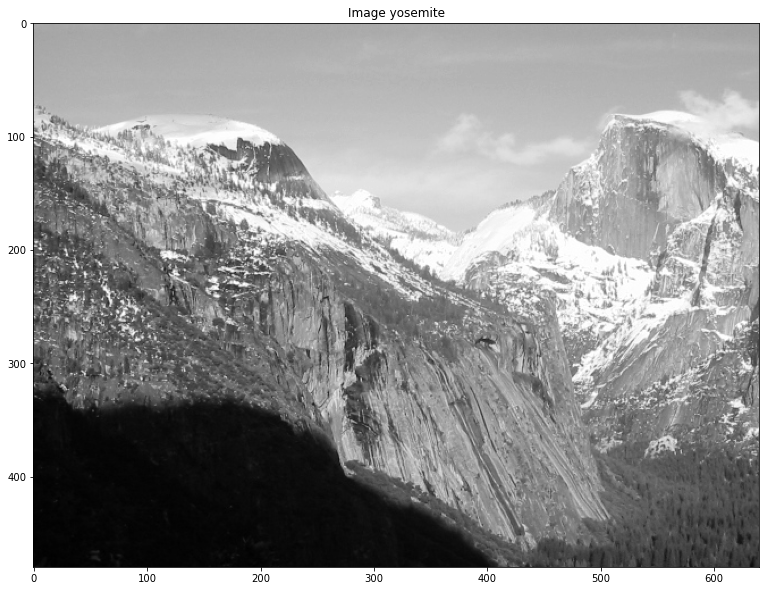

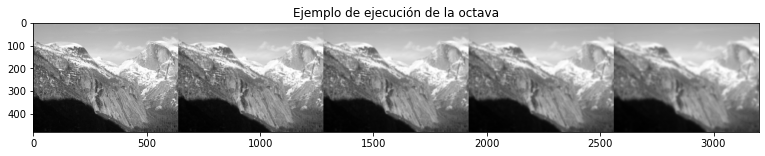

In [4]:
# Comprobaci√≥n de la ejecuci√≥n de la funci√≥n

## leemos imagen 
img_yosemite1 = ReadImage('./yosemite/Yosemite1.jpg', flagGrey)#flagColor)
PrintOneImage(img_yosemite1, 'Image yosemite')

octava = CalculaOctava(img_yosemite1)
PrintMultiplesImagenes(octava, 'Ejemplo de ejecuci√≥n de la octava')


[] c) Usar la funci√≥n implementada en (b) para calcular las escalas de
todas las octavas (0-3). Mostrar las im√°genes calculadas agrupadas
por octava (mostrar solo las escalas 1,2 y 3 en cada octava). 

Para ello primero necesitaremos: 
1. Calcula la interpolaci√≥n. v_0
2. Calcular octava a partir de  v_0
3. (Si se desea otra nueva octava). Interpolar la cuarta imagen de la octava anterior. Volver al paso 2. 


In [5]:
def EspacioEscalasGaussiano( v_original, ns : int,): 
    '''
        v_original: imagen original
        ns n√∫mero escalas, si ns = 3 entonces devuelve 4 escalas.
    '''
    indice_imagen_semilla = 3
    anchura = v_original.shape[1]
    altura = v_original.shape[0]
    v_0 =  cv.resize(
            src = v_original, dsize = (anchura*2, altura*2), 
            interpolation = cv.INTER_LINEAR # interpolaci√≥n bilineal 
    )
    espacioEscalas = []
    for i in range(ns+1): 
        # Calculamos la escala
        espacioEscalas.append(CalculaOctava(v_0))
        # calculamos reescalado 
        imagen_semilla = np.copy(espacioEscalas[-1][indice_imagen_semilla])
        anchura = imagen_semilla.shape[1]
        altura = imagen_semilla.shape[0]
        v_0  =  cv.resize(
            src = imagen_semilla, dsize = (anchura//2, altura//2), 
            interpolation = cv.INTER_LINEAR # interpolaci√≥n bilineal 
        )
    return espacioEscalas

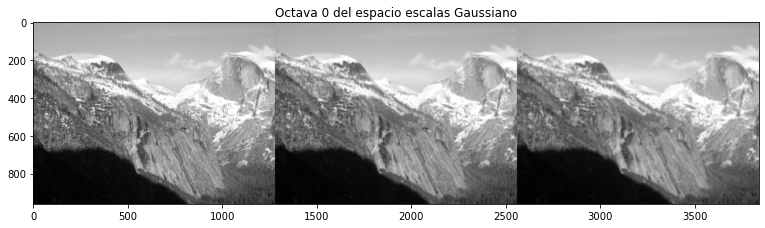

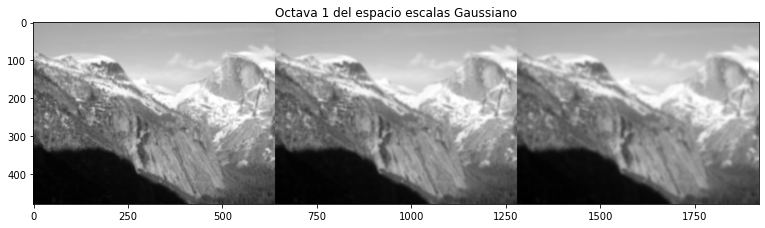

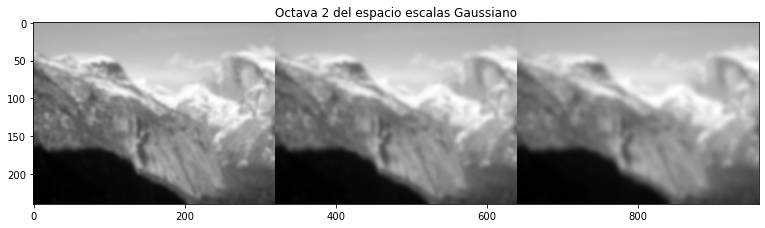

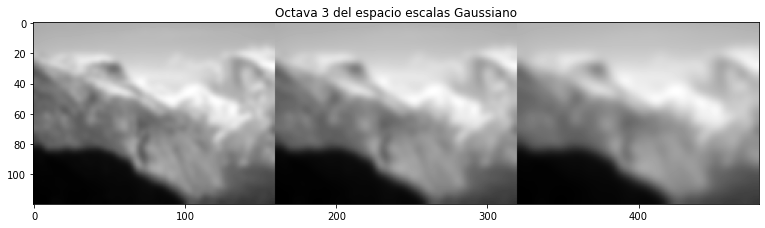

In [6]:
## Vamos a visualizar el espacio de escalas de nuestra imagen 
# tarda unos 35s en ejecutarse 
espacio_escalas_gaussiano = EspacioEscalasGaussiano(img_yosemite1, 3)
for i, octava in enumerate(espacio_escalas_gaussiano): 
    # mostramso solo escala 1,2,3
    PrintMultiplesImagenes(octava[1:4], f'Octava {i} del espacio escalas Gaussiano')

## Reflexi√≥n de porqu√© est√° funcionando

[] d)  
[] 1. Calcular el espacio de escalas Laplaciano a partir de la pir√°mide e
[] 2. identificar los 100 extremos locales con mayor respuesta, presentes
en la misma. 
[] 3. Extraer en un vector (x,y,$\sigma$) para cada uno de ellos en
los ejes de la imagen original.

## C√≥mo se va a solucionar   

Para el apartado 1 calcularemos la pir√°mide de Lowe, que consiste en restar los niveles adyacentes de cada octava del espacio de escalas Gaussiano, la funci√≥n donde se resuelve es `PiramideLowe(piramide_gaussiana)`. 
En el enunciado se pide es espacio de escalas Laplaciano, en nuestro caso de va a impleentar la diferencia de gaussianas, (el operador DoG) ya que es una buena aproximaci√≥n y se calcula de forma m√°s eficiente. 
(TODO : profundizar en que es una aproximaci√≥n y que se calcula de forma m√°s eficiente)

Para el apartado 2, calcularemos m√°ximos locales en 3D. Para hacer


In [7]:
# d1
def PiramideLowe(piramide_gaussiana):
    ''' Resta los niveles adyacentes de cada octava del espacio de escalas Gaussiano
    '''
    return np.array([
        [ octava[i] - octava[i+1] for i in range(len(octava)-1)] 
        for octava in piramide_gaussiana
    ])


/tmp/ipykernel_3691/4152383602.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([


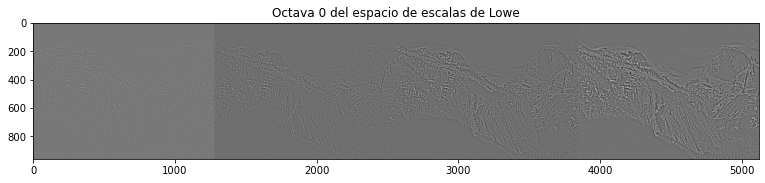

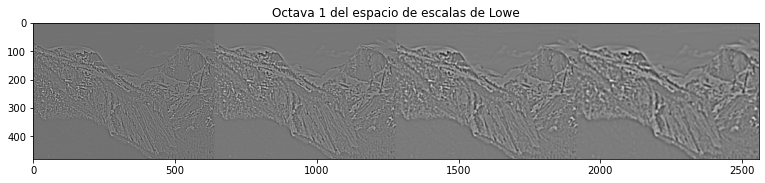

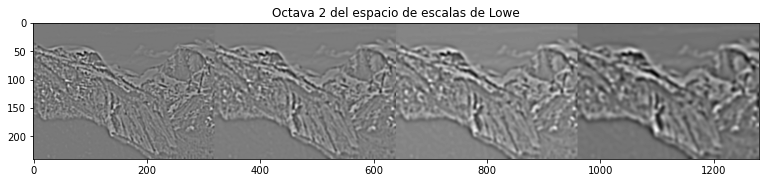

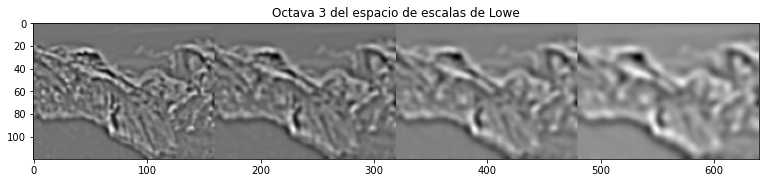

In [8]:
## Visualizamos su correcto funcionamiento 
espacio_escalas_laplaciano = PiramideLowe(espacio_escalas_gaussiano)
for i, octava in enumerate(espacio_escalas_laplaciano): 
    # mostramso solo escala 1,2,3
    PrintMultiplesImagenes(octava, f'Octava {i} del espacio de escalas de Lowe')

# duda ¬øqu√© se hace con los extremos? ¬øah√≠ no se mira?
# mayor estricto o mayor o igual ¬ø? 

In [9]:
# Tarda 1m con 7.5 segundos 
def BlurLevel( o:int,  s: int,  nspo = 3, delta_min = 0.5 , sigma_min = 0.8):
    delta_o = delta_min* 2**(o-1)
    sigma_o_s = delta_o / delta_min* sigma_min * 2**(float(s)/nspo)
    return sigma_o_s

def DetectaExtremos(espacio_escalas): 
    extremos = []
    for ind_octava, octava in enumerate(espacio_escalas):
        #calculamos tama√±o de cada escala
        anchura = octava[0].shape[1]
        altura = octava[0].shape[0]
        # TODO : es muy poco efiente 
        for s in range( 1,len(octava)-1):
            for w in range(1,anchura-1):
                for h in range(1,altura-1):
                    contiguos = np.array([octava[i][h-1: h+2,w-1:w+2] for i in range(s-1, s+2)])
                    if (octava[s][h][w] == np.min(contiguos)):
                        extremos.append({'tipo_extremo':'min', 'octava': ind_octava, 
                        'nivel': s, 'x':w, 'y':h, 
                        'valor': octava[s][h][w],
                        'sigma': BlurLevel(ind_octava,s)})
                    elif (octava[s][h][w] == np.max(contiguos)):
                        extremos.append({'tipo_extremo':'max', 
                        'octava': ind_octava, 'nivel': s, 'x':w, 
                        'y':h,  'valor':octava[s][h][w], 'sigma': BlurLevel(ind_octava,s)})

    # ordenamos los extremos de m√°s representativo
    extremos = sorted(extremos, key = lambda e : -e['valor'])

    return extremos

def ExpresaEnTupla(extremos, numero_tuplas):
    mas_representativos = extremos[:numero_tuplas]
    formato_tuplas = list(map(lambda e: (e['x'], e['y'], e['sigma']),mas_representativos))
    return formato_tuplas
    
# TODO DESCOMENTAR
#extremos = DetectaExtremos(espacio_escalas_laplaciano)
#key_points = ExpresaEnTupla(extremos, 100)
#print(key_points)

[(57, 401, 0.5039684199579493), (343, 435, 0.5039684199579493), (137, 492, 0.5039684199579493), (326, 482, 0.5039684199579493), (351, 438, 0.5039684199579493), (358, 459, 0.6349604207872798), (159, 513, 0.6349604207872798), (126, 469, 0.6349604207872798), (59, 524, 0.6349604207872798), (266, 414, 0.5039684199579493), (812, 480, 0.5039684199579493), (1233, 707, 0.5039684199579493), (402, 290, 0.6349604207872798), (1231, 718, 0.6349604207872798), (872, 482, 0.5039684199579493), (182, 506, 0.6349604207872798), (36, 242, 1.0079368399158986), (301, 322, 0.6349604207872798), (865, 537, 0.6349604207872798), (259, 299, 0.6349604207872798), (695, 477, 0.5039684199579493), (211, 146, 1.0079368399158986), (1125, 631, 0.6349604207872798), (125, 220, 1.0079368399158986), (173, 263, 1.0079368399158986), (620, 335, 1.2699208415745595), (523, 365, 0.5039684199579493), (418, 321, 0.5039684199579493), (197, 202, 1.0079368399158986), (466, 339, 0.6349604207872798), (369, 244, 0.6349604207872798), (443, 3

In [10]:
# Vamos a ver informaci√≥n sobre los key points 
def InformacionSobreKeyPoints ( extremos, noc): 
    numero_extremos = len(extremos)
    print( f'El n√∫mero total de keypoints es {numero_extremos}')
    for i in range(noc):
        longitud = len(list(filter( lambda e : e['octava'] == i, extremos)))
        print(f'En la octava {i} hay {longitud} keypoints, un {np.round(longitud/numero_extremos,2)}%.')
    print('\nLos 100 m√°s representativos se distribuyen: ')
    for i in range(noc):
        longitud = len(list(filter( lambda e : e['octava'] == i, extremos[:100])))
        print(f'En la octava {i} hay {longitud} keypoints, un {np.round(longitud/100,2)}%.')
    print('\n')
# TODO DESCOMENTAR
#InformacionSobreKeyPoints(extremos, len(espacio_escalas_laplaciano))
#print( extremos[0:10])

El n√∫mero total de keypoints es 1495
En la octava 0 hay 704 keypoints, un 0.47%.
En la octava 1 hay 589 keypoints, un 0.39%.
En la octava 2 hay 161 keypoints, un 0.11%.
En la octava 3 hay 41 keypoints, un 0.03%.

Los 100 m√°s representativos se distribuyen: 
En la octava 0 hay 73 keypoints, un 0.73%.
En la octava 1 hay 22 keypoints, un 0.22%.
En la octava 2 hay 3 keypoints, un 0.03%.
En la octava 3 hay 2 keypoints, un 0.02%.


[{'tipo_extremo': 'max', 'octava': 0, 'nivel': 1, 'x': 57, 'y': 401, 'valor': 26.308719102386533, 'sigma': 0.5039684199579493}, {'tipo_extremo': 'max', 'octava': 0, 'nivel': 1, 'x': 343, 'y': 435, 'valor': 24.493203488481413, 'sigma': 0.5039684199579493}, {'tipo_extremo': 'max', 'octava': 0, 'nivel': 1, 'x': 137, 'y': 492, 'valor': 23.109769553117218, 'sigma': 0.5039684199579493}, {'tipo_extremo': 'max', 'octava': 0, 'nivel': 1, 'x': 326, 'y': 482, 'valor': 22.943735657687995, 'sigma': 0.5039684199579493}, {'tipo_extremo': 'max', 'octava': 0, 'nivel': 1, 'x': 35

## Apartado 1.e
[] e) Mostrar la imagen con los extremos locales extra√≠dos usando para
ello un c√≠rculo de radio 6x sobre la escala de detecci√≥n $\sigma$.

Para ello vamos a usar la funci√≥n `drawKeyPoints()` 
que seg√∫n la documentaci√≥n oficial consultada a d√≠a 21 de noviembre: https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html

Admite los siguientes par√°metros: 
`	cv.drawKeypoints(	image, keypoints, outImage[, color[, flags]]	) -> 	outImage `

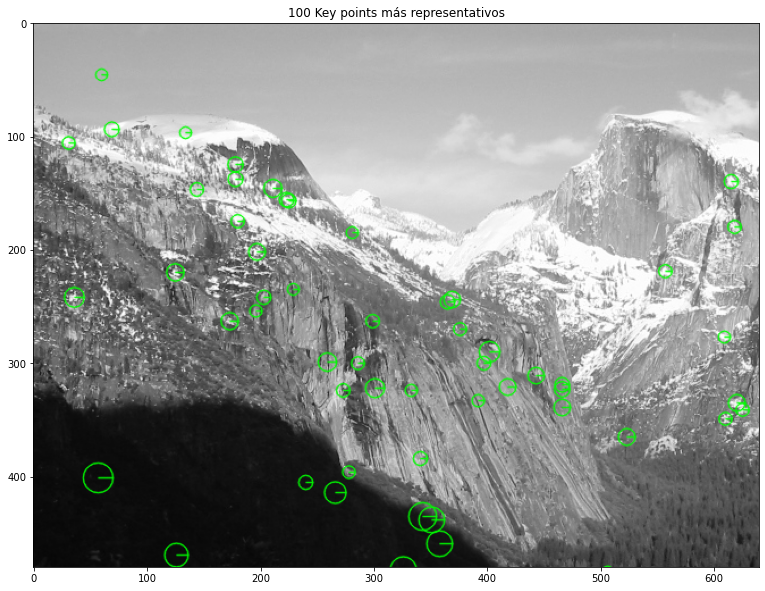

In [11]:
## Funci√≥n apartado 1.e

def ExpresaEnKeyPoints (key_points):
    return list(map( lambda e: cv.KeyPoint(e['x'], e['y'], e['valor'], e['octava']),key_points))

#TODO DESCOMENTAR
#img = cv.drawKeypoints(np.uint8(img_yosemite1),ExpresaEnKeyPoints(extremos[:100]),np.array([]),(0,255,0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#PrintOneImage(img, '100 Key points m√°s representativos')

### Conclusiones
TODO

La mayor√≠a de los keypoints se encuentran en las dos primeras escalas, lo cual es lo esperado. 

## Distintos apartados a completar en el ejercicio 1 son

[] a) ¬øQu√© operaciones sobre la imagen original de ùúé = 0.8 nos permite
fijar una imagen semilla de ùúé = 1.6 ?  

[] b) Implementar una funci√≥n que calcule las escalas de cualquier octava
de la forma m√°s eficiente posible. Es decir, reusable para cualquier
escala.

[] c) Usar la funci√≥n implementada en (b) para calcular las escalas de
todas las octavas (0-3). Mostrar las im√°genes calculadas agrupadas
por octava (mostrar solo las escalas 1,2 y 3 en cada octava). 

[] d) Calcular el espacio de escalas Laplaciano a partir de la pir√°mide e
identificar los 100 extremos locales con mayor respuesta, presentes
en la misma. Extraer en un vector (x,y,$\sigma$) para cada uno de ellos en
los ejes de la imagen original.

[] e) Mostrar la imagen con los extremos locales extra√≠dos usando para
ello un c√≠rculo de radio 6x sobre la escala de detecci√≥n $\sigma$.

[] f) Bonus.- (1 punto) Qui√©n realice este punto usando c√≥digo propio de
convoluci√≥n y submuestreo (pir√°mide de Lowe).## Distintos apartados a completar en el ejercicio 1 son

[] a) ¬øQu√© operaciones sobre la imagen original de ùúé = 0.8 nos permite
fijar una imagen semilla de ùúé = 1.6 ?  

[] b) Implementar una funci√≥n que calcule las escalas de cualquier octava
de la forma m√°s eficiente posible. Es decir, reusable para cualquier
escala.

[] c) Usar la funci√≥n implementada en (b) para calcular las escalas de
todas las octavas (0-3). Mostrar las im√°genes calculadas agrupadas
por octava (mostrar solo las escalas 1,2 y 3 en cada octava). 

[] d) Calcular el espacio de escalas Laplaciano a partir de la pir√°mide e
identificar los 100 extremos locales con mayor respuesta, presentes
en la misma. Extraer en un vector (x,y,$\sigma$) para cada uno de ellos en
los ejes de la imagen original.

[] e) Mostrar la imagen con los extremos locales extra√≠dos usando para
ello un c√≠rculo de radio 6x sobre la escala de detecci√≥n $\sigma$.

[] f) Bonus.- (1 punto) Qui√©n realice este punto usando c√≥digo propio de
convoluci√≥n y submuestreo (pir√°mide de Lowe).

# Dudas: ¬øqu√© es la representaci√≥n de un keypoints? ¬øC√≥mo sacar el sigma?

# Reflexi√≥n sobre lo obtenido
TODO
Las frecuencias m√°s altas podemos pensar que son las que tienen m√°s detalle, luego es normal 

# Ejercicio 2 

2.-  (1.5 puntos)  (Correspondencias)   
[] Con cada dos de las im√°genes de Yosemite con solapamiento detectar y 
extraer los descriptores SIFT de OpenCV, usando para ello la funci√≥n cv2. 
detectAndCompute().     

[] Establecer los puntos en correspondencias existentes 
entre las dos im√°genes usando el objeto BFMatcher de OpenCV 

[] y los criterios de correspondencias ‚ÄúBruteForce+crossCheck 
[]y ‚ÄúLowe-Average-2NN‚Äù.  
[] Mostrar ambas im√°genes en un mismo canvas 
[] y pintar l√≠neas de diferentes colores 
entre las coordenadas de los puntos en correspondencias. Mostrar en cada 
caso un m√°ximo de 100 elegidas aleatoriamente. 


## Funci√≥n detecAndCompute
Buscamos en la documentaci√≥n oficial a d√≠a 21 noviembre de 2021 de  SIFT`detectAndCompute`, cuyo link  es: 
-  https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677   
-  https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html  


```
cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	) -> 	keypoints, descriptors
```

### Funci√≥n `BFMatcher`  

Bibliografia ( a d√≠a 22/10/21): 
- http://www.bim-times.com/opencv/4.3.0/dc/dc3/tutorial_py_matcher.html

Dadas dos im√°genes, la funci√≥n `BFMatcher` implementa el algoritmo de fuerza bruta, que consiste en tomar el descriptor de una caracter√≠stica de una imagen y emparejarlo con la caracter√≠stica de la segunda imagen  que m√°s se aproxime a √©l.    

Acepta como par√°metros la distancia a usar, que nosotros hemos elegido la norma eucl√≠dea, `NORM_L2` ya que por produce buenos resultados. 

El otro par√°metro a configurar es `crossCheck`, que hemos configurado como `true` ya que es lo que se pide en el enunciado. 
Gracias a esto lo que se consigue es que solo se emparejen las parejas $(i,j)$ tal que el descriptor $i$ en primera imagen es emparejado con $j$, pero si se tomara el descriptor $j$ de la segunda, este se emparejar√≠a con $i$.  Es decir, ambos son las mejores aproximaciones del otro. Este algoritmo fue propuesto en el paper SIFT de Lowe.  

El n√∫mero de matches obtenido es de 1236.


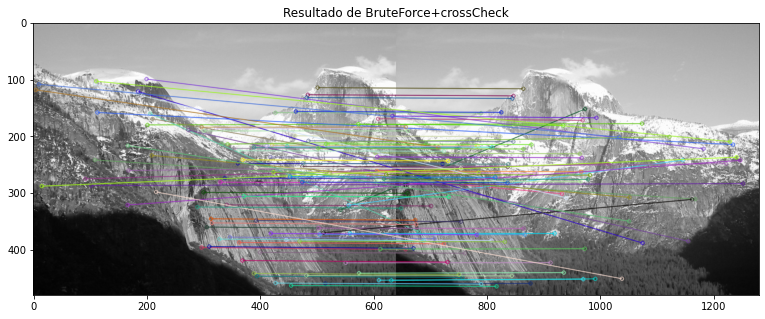

In [37]:
# Leemos las im√°gines pertinentes a esta pr√°ctica
img_yosemite1 = ReadImageSinAsarray('./yosemite/Yosemite1.jpg', flagGrey)
img_yosemite2 = ReadImageSinAsarray('./yosemite/Yosemite2.jpg', flagGrey)

# Inicializamos el detector de SIFT
sift = cv.SIFT_create()

# buscamos los keypoints y los descriptores  
kp1, des1 = sift.detectAndCompute(img_yosemite1,None)
kp2, des2 = sift.detectAndCompute(img_yosemite2,None)

#  Creamos BFMatcher el object0
# los criterios de correspondencias ‚ÄúBruteForce+crossCheck 
# norm_L2 es el valor por defecto, lo dejamos porque seg√∫n la documentaci√≥n oficial es funciona mejor
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True) 

# Emparejamos los descriptores.
matches = np.array(bf.match(des1,des2))
print( f'El n√∫mero de matches obtenido es de {len(matches)}.')
img3 = np.copy(img_yosemite1)
# mostramos 100 aleatorios
img3 = cv.drawMatches(img_yosemite1,kp1,
img_yosemite2,kp2,
np.random.choice(matches, 100, False),
img3,
flags=2)

PrintOneImage(img3, 'Resultado de BruteForce+crossCheck')

## An√°lisis del resultado   

La direcci√≥n en la que predominan las l√≠neas paralelas es indicativo de cu√°l ser√≠a la homotopia correcta. Las l√≠neas que se cruzan son errores, probablemente debidos a que la distancia entre esas caracter√≠sticas y las otras 

Se han obtenido 926


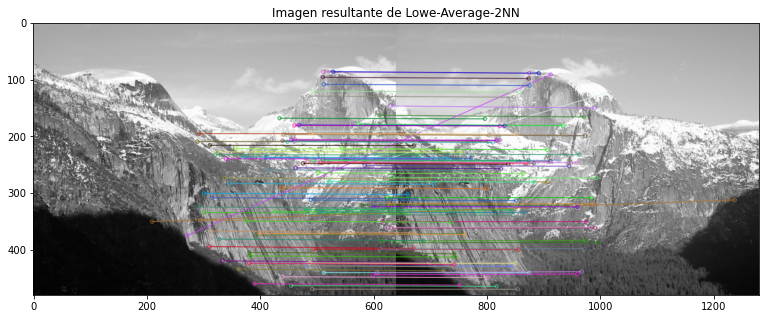

In [35]:
ratio_thresh = 0.75

sift = cv.SIFT_create()

# buscamos los keypoints y los descriptores  
kp1, des1 = sift.detectAndCompute(img_yosemite1,None)
kp2, des2 = sift.detectAndCompute(img_yosemite2,None)

# ya no es necesario aplicar el crossCheck 
# TODO quiz√°s fuera interesante comparar qu√© pasar√≠a si se aplicara
bf = cv.BFMatcher()
matches = np.array(bf.knnMatch(des1,des2, k=2))

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < ratio_thresh*n.distance:
        good.append(m)

print(f'Se han obtenido {len(good)} maches')
# cv2.drawMatchesKnn expects list of lists as matches.
good = np.array(good)

np.random.seed(1) #semilla 
randomMatches = np.random.choice(good, 100, False).reshape(-1,1)

img3 = cv.drawMatchesKnn(
    img_yosemite1,kp1,
    img_yosemite2,kp2,
    randomMatches,
    np.array([]),
    flags=2
)

PrintOneImage(img3, 'Imagen resultante de Lowe-Average-2NN')

### Conclusiones

Podemos comprobar que ahora la tendencia es mucho m√°s fuerte que en el caso anterior.
Pero el m√©todo no es infalible como podemos ver en el ejemplo anterior ( por eso se fij√≥ la semilla).  
Sigue habiendo casos extremos que se podr√≠an eliminar volviendo m√°s estricto el ratio, aunque a riesgo de disminuir el n√∫mero de caracter√≠sticas emparejadas con √©xito y existiendo la posibilidad de error. 

Se pone pues de manifiesto la necesidad de encontrar un equilibrio entre cu√°nto de estrictos ser y n√∫mero de caracter√≠sticas obtenidas. 

Veamos ejemplo de esto en la siguiente celda. 

### TODO ¬øPor lo general siempre habr√° m√°s en uno que en otro?



Se han obtenido 867 maches


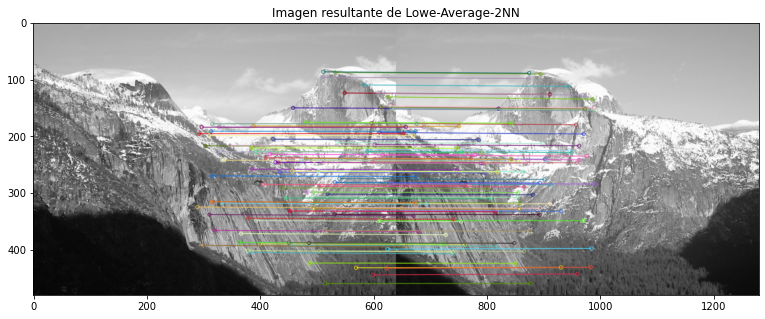

In [38]:
ratio_thresh = 0.5

sift = cv.SIFT_create()

# buscamos los keypoints y los descriptores  
kp1, des1 = sift.detectAndCompute(img_yosemite1,None)
kp2, des2 = sift.detectAndCompute(img_yosemite2,None)

# ya no es necesario aplicar el crossCheck 
# TODO quiz√°s fuera interesante comparar qu√© pasar√≠a si se aplicara
bf = cv.BFMatcher()
matches = np.array(bf.knnMatch(des1,des2, k=2))

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < ratio_thresh*n.distance:
        good.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.

print(f'Se han obtenido {len(good)} maches')
good = np.array(good)

np.random.seed(1) #semilla 
randomMatches = np.random.choice(good, 100, False).reshape(-1,1)

img3 = cv.drawMatchesKnn(
    img_yosemite1,kp1,
    img_yosemite2,kp2,
    randomMatches,
    np.array([]),
    flags=2
)

PrintOneImage(img3, 'Imagen resultante de Lowe-Average-2NN')

# Conclusiones ejercicio 2

- N√∫mero de resultados (dependiente de la imagen?)
- otro m√©todos como RASAC


# Ejercicio 2 

2.-  (1.5 puntos)  (Correspondencias) 
[]Con cada dos de las im√°genes de Yosemite con solapamiento detectar y 
extraer los descriptores SIFT de OpenCV, usando para ello la funci√≥n cv2. 
detectAndCompute(). 
[] Establecer los puntos en correspondencias existentes 
entre las dos im√°genes usando el objeto BFMatcher de OpenCV 

[] y los criterios de correspondencias ‚ÄúBruteForce+crossCheck 
[]y ‚ÄúLowe-Average-2NN‚Äù.  
[] Mostrar ambas im√°genes en un mismo canvas 
[] y pintar l√≠neas de diferentes colores 
entre las coordenadas de los puntos en correspondencias. Mostrar en cada 
caso un m√°ximo de 100 elegidas aleatoriamente. 